Mermaid diagrams can be generated directly in markdown

```mermaid
graph LR
  s((start))
  e((end))
  s-->CAC-->ACA-->CAG-->AGC-->GCA-->CAT-->e
  CAC-->ACG-->CGA-->GAG-->AGC
```

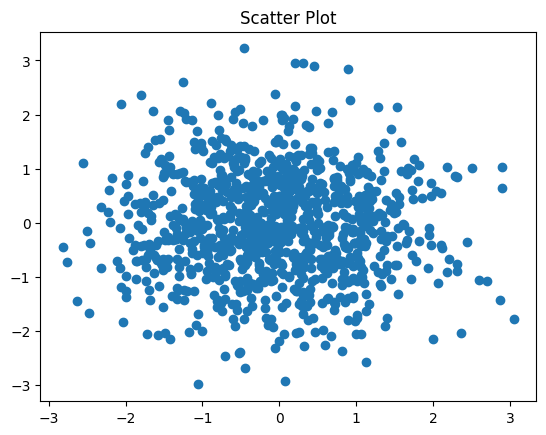

In [1]:
# generate a sample scatter plot


import matplotlib.pyplot as plt
import numpy as np

# generate random data
x = np.random.randn(1000)
y = np.random.randn(1000)

# create a scatter plot
plt.scatter(x, y)


# add a title
plt.title('Scatter Plot')

plt.show()

In [5]:
# write all cells that have a tag of 'export' to the images folder
# this is useful for exporting the images to a folder to be shown in a MARP slideshow

import nbformat
import os
from nbconvert import HTMLExporter
import html2image

# Function to find and render tagged cells
def extract_and_render_cells(notebook_path, output_dir, tag="export"):
    os.makedirs(output_dir, exist_ok=True)

    # Load the notebook
    with open(notebook_path, 'r', encoding='utf-8') as f:
        notebook = nbformat.read(f, as_version=4)

    # Extract tagged cells
    tagged_cells = [
        (idx, cell) for idx, cell in enumerate(notebook.cells)
        if "metadata" in cell and "tags" in cell.metadata and tag in cell.metadata["tags"]
    ]

    # Convert to HTML and render as images
    html_exporter = HTMLExporter()
    hti = html2image.Html2Image()

    NOTEBOOK_NAME = os.path.splitext(notebook_path)[0]  # Remove .ipynb extension

    for cell_idx, cell in tagged_cells:
        html_content, _ = html_exporter.from_notebook_node({"cells": [cell], "metadata": {}})
        image_filename = f"{NOTEBOOK_NAME}_{cell_idx}.png"
        image_path = os.path.join(output_dir, image_filename)

        # Render the cell as an image
        hti.screenshot(html_str=html_content, save_as=image_path)
        print(f"✅ Rendered: {image_path}")

# Run the function
# Define output directory
NOTEBOOK_NAME = os.path.splitext(NOTEBOOK_PATH)[0]  # Remove .ipynb extension

extract_and_render_cells('construct_chart.ipynb', 'images')


FileNotFoundError: Could not find a Chrome executable on this machine, please specify it yourself.

NameError: name '__file__' is not defined